# Imports

In [10]:
from fastai import *
import pandas as pd
import numpy as np
from fastai.tabular.all import *


# Bring in data

In [6]:
# read from csv
data_df = pd.read_csv('./data/eig_centrality.csv', header=None)
# drop columns with zeros
data_df = data_df.loc[:, (data_df != 0).any(axis=0)].abs()
data_df.head(20)

,0,1,2,6,7,10,12,13,14,15,...,285,286,287,288,289,290,291,292,293,294
0,1,0.067894,0.062832,0.031240,0.071004,0.030888,0.009534,0.044660,0.043163,0.025440,...,0.112760,0.106070,0.000000e+00,0.000000e+00,0.028195,0.024616,0.042535,0.087451,0.003145,0.047196
1,1,0.031793,0.025996,0.122030,0.109220,0.005733,0.017223,0.072822,0.077072,0.126650,...,0.078364,0.049836,0.000000e+00,6.938900e-18,0.076947,0.078418,0.064815,0.095082,0.054585,0.076347
2,1,0.005251,0.015806,0.124040,0.117020,0.017355,0.035984,0.106950,0.011851,0.077032,...,0.021125,0.014470,0.000000e+00,1.734700e-18,0.068705,0.084321,0.047107,0.004649,0.142760,0.129450
3,1,0.123150,0.096576,0.045236,0.005143,0.017959,0.060064,0.008232,0.076910,0.042061,...,0.043127,0.024063,5.551100e-17,1.110200e-16,0.064510,0.100380,0.112950,0.099919,0.006036,0.004228
4,1,0.059846,0.024500,0.022105,0.022153,0.079495,0.013115,0.019867,0.032033,0.012232,...,0.026404,0.004397,4.336800e-19,0.000000e+00,0.068379,0.006091,0.050172,0.056009,0.077894,0.016500
5,1,0.047201,0.023249,0.107190,0.117740,0.010293,0.040863,0.098316,0.047187,0.101880,...,0.047042,0.084535,0.000000e+00,0.000000e+00,0.095798,0.073266,0.094619,0.084386,0.081942,0.105320
6,1,0.089435,0.080275,0.001140,0.014447,0.027198,0.026102,0.116720,0.049616,0.060910,...,0.005671,0.003008,0.000000e+00,0.000000e+00,0.009444,0.036900,0.022935,0.029724,0.020147,0.023445
7,1,0.092537,0.003668,0.129430,0.107730,0.088690,0.042226,0.059388,0.037930,0.075362,...,0.015637,0.001023,2.168400e-19,0.000000e+00,0.038453,0.111860,0.055049,0.015476,0.125960,0.093968
8,1,0.022265,0.048711,0.048122,0.032252,0.037123,0.059852,0.011789,0.071290,0.109800,...,0.021779,0.004315,2.710500e-20,0.000000e+00,0.099726,0.076015,0.106140,0.054908,0.038627,0.040091
9,1,0.111080,0.023740,0.027010,0.011543,0.089719,0.020014,0.013929,0.058090,0.067178,...,0.011984,0.053828,6.938900e-18,2.775600e-17,0.059277,0.059997,0.101670,0.027837,0.029670,0.012809


In [193]:
splits = RandomSplitter(valid_pct=0.2)(range_of(data_df))
dls = TabularDataLoaders.from_df(data_df,y_names=0,
                                 splits=splits, y_block=CategoryBlock, bs = 2
                                 )
print(dls.train_ds)

    0         1         2         6         7         10        12        13   \
38    0  0.090445  0.048489  0.003303  0.047444  0.045181  0.033525  0.003352   
33    0  0.018437  0.061860  0.103210  0.077021  0.037732  0.033155  0.021030   
12    1  0.015845  0.010190  0.047412  0.037297  0.003051  0.042403  0.036934   
30    1  0.033484  0.031413  0.078173  0.028680  0.027641  0.065337  0.011905   
37    0  0.049091  0.008591  0.112990  0.064983  0.019109  0.063146  0.065904   
35    0  0.076509  0.060253  0.004090  0.025761  0.006309  0.032559  0.013206   
27    1  0.035157  0.039537  0.067910  0.101140  0.005098  0.089630  0.038746   
48    0  0.052343  0.013699  0.076206  0.055063  0.034283  0.048854  0.054883   
55    0  0.108460  0.113810  0.069538  0.083321  0.025051  0.010763  0.055477   
7     1  0.092537  0.003668  0.129430  0.107730  0.088690  0.042226  0.059388   
22    1  0.131400  0.129810  0.064063  0.015930  0.035544  0.049971  0.048844   
16    1  0.001816  0.000318 

In [194]:
print(dls.valid_ds)

    0         1         2         6         7         10        12        13   \
28    1  0.098766  0.034662  0.014491  0.032128  0.002147  0.006175  0.007936   
29    1  0.044496  0.110350  0.054303  0.031899  0.020381  0.058955  0.071782   
2     1  0.005251  0.015806  0.124040  0.117020  0.017355  0.035984  0.106950   
46    0  0.037310  0.004927  0.026262  0.028949  0.101170  0.029140  0.083882   
21    1  0.075043  0.060042  0.023301  0.014660  0.040922  0.048344  0.049045   
24    1  0.008251  0.007738  0.064480  0.059373  0.021906  0.017984  0.097621   
1     1  0.031793  0.025996  0.122030  0.109220  0.005733  0.017223  0.072822   
6     1  0.089435  0.080275  0.001140  0.014447  0.027198  0.026102  0.116720   
13    1  0.060620  0.072223  0.024636  0.047925  0.034810  0.080044  0.065747   
18    1  0.147730  0.147670  0.104270  0.031001  0.043729  0.028454  0.040738   
56    0  0.096817  0.071730  0.006467  0.101770  0.037002  0.060393  0.066790   
5     1  0.047201  0.023249 

In [195]:
learn = tabular_learner(dls, layers = [120,60], metrics=accuracy)

SuggestedLRs(valley=0.005248074419796467)

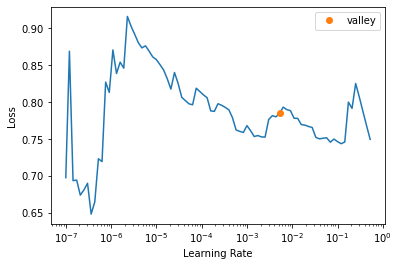

In [196]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.709806,0.619263,0.833333,00:00
1,0.742041,0.642465,0.750000,00:00
2,0.718805,0.650410,0.666667,00:00
3,0.699367,0.618433,0.583333,00:00
4,0.706624,0.675918,0.583333,00:00
5,0.684468,0.629976,0.500000,00:00
6,0.673235,0.657408,0.583333,00:00
7,0.685975,0.660250,0.500000,00:00
8,0.696686,0.676088,0.666667,00:00
9,0.702509,0.673639,0.500000,00:00


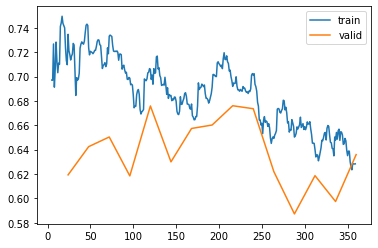

In [197]:
learn.fit_one_cycle(15)
learn.recorder.plot_loss()

In [189]:
learn.get_preds()

(tensor([[0.5993, 0.4007],
         [0.4585, 0.5415],
         [0.4940, 0.5060],
         [0.7865, 0.2135],
         [0.5643, 0.4357],
         [0.6618, 0.3382],
         [0.5668, 0.4332],
         [0.5952, 0.4048],
         [0.7322, 0.2678],
         [0.7288, 0.2712],
         [0.4668, 0.5332],
         [0.3795, 0.6205]]),
 tensor([[1],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1]], dtype=torch.int8))

In [177]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(273, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=273, out_features=60, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=60, out_features=30, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=30, out_features=10, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=10, out_features=5, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affin